# Visualization of Pokemon dataset using Pandas and Seaborn
![Banner](https://github.com/serivan/mldmlab/blob/master/Python-Introduction/scripts/pokemons.png?raw=1)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd   
import seaborn as sns

In [0]:
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 100

Now we can load the dataset, let's name the dataframe as `pokedata` and take a look at the first and last 10 rows of the dataset to get a general knowledge of the data.

In [0]:
pokedata = pd.read_csv('https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Pokemon_all.csv')

In [9]:
pokedata.head(10)   

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [10]:
pokedata.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
876,798,Kartana,grass,steel,570,59,181,131,59,31,109,7,False
877,799,Guzzlord,dark,dragon,570,223,101,53,97,53,43,7,False
878,800,Necrozma,psychic,NaN,600,97,107,101,127,89,79,7,True
879,801,Magearna,steel,fairy,600,80,95,115,130,115,65,7,True
880,802,Marshadow,fighting,ghost,600,90,125,80,90,90,125,7,True
881,803,Poipole,poison,NaN,420,67,73,67,73,67,73,7,False
882,804,Naganadel,poison,dragon,540,73,73,73,127,73,121,7,False
883,805,Stakataka,rock,steel,570,61,131,211,53,101,13,7,False
884,806,Blachepalon,fire,ghost,570,53,127,53,151,79,107,7,False
885,807,Zeraora,electric,NaN,600,88,112,75,102,80,143,7,True


## Cleaning the dataset
If we look carefully at the 10 rows in the dataset above, we can see some problems in the dataset.

  - Some Pokemon have `NaN` values (null values) in the column `Type 2`
  - Some Pokemon have multiple forms and those forms are included in this dataset
  - In gen 7, the Pokemon type doesn't start with capital letter like all gen before it, Pandas will count this as a different type

We need to do some cleaning in the dataset before it is ready to use.

Now let's capitalize only the first letter of the Pokemon type.

In [0]:
pokedata['Type 1'] = pokedata['Type 1'].str.capitalize()
pokedata['Type 2'] = pokedata['Type 2'].str.capitalize()

Let's remove the duplicate Pokemon

In [0]:
pokedata.drop_duplicates('#', keep='first', inplace=True)

Some Pokemon doesn't have secondary type so they have `NaN` (null values) in the `Type 2` column. Let's fill in the null values in the `Type 2` column by replacing it with value `None`

In [0]:
pokedata['Type 2'].fillna(value='None', inplace=True)

Now set the `#` column to be index of `pokedata`

In [0]:
pokedata.set_index('#', inplace=True)

Now let's take a look at the first and last 10 rows of the dataset one more time

In [15]:
pokedata.head(10)  

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Squirtle,Water,None,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,None,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,None,530,79,83,100,85,105,78,1,False


In [16]:
pokedata.tail(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
798,Kartana,Grass,Steel,570,59,181,131,59,31,109,7,False
799,Guzzlord,Dark,Dragon,570,223,101,53,97,53,43,7,False
800,Necrozma,Psychic,None,600,97,107,101,127,89,79,7,True
801,Magearna,Steel,Fairy,600,80,95,115,130,115,65,7,True
802,Marshadow,Fighting,Ghost,600,90,125,80,90,90,125,7,True
803,Poipole,Poison,None,420,67,73,67,73,67,73,7,False
804,Naganadel,Poison,Dragon,540,73,73,73,127,73,121,7,False
805,Stakataka,Rock,Steel,570,61,131,211,53,101,13,7,False
806,Blachepalon,Fire,Ghost,570,53,127,53,151,79,107,7,False


The data is much cleaner and now it's ready to use. Now we can do some analysis and visualization.

## Pokemon count in each generation
First, let's verify how many Pokemon are there in this dataset

In [17]:
pokedata['Name'].count()

807

Now let's see how Pokemons are distributed in each generation.

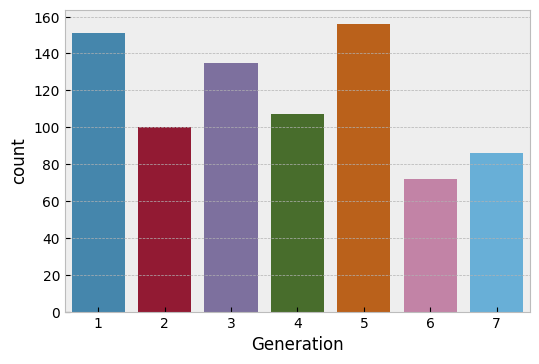

In [18]:
sns.countplot(
    x='Generation', 
    data=pokedata,
);

## Legendary Pokemon count
Legendary Pokemon are a group of incredibly rare and often very powerful Pokemon, generally featured prominently in the legends and myths of the Pokémon world.

We'll simplify the categorization and count the mythical Pokemon and the ultra beasts as a legendary Pokemon. First, let's take a look at how rare they are, and then we can visualize the distribution between legendary and non legendary Pokemon.

In [19]:
pokedata['Legendary'].value_counts()

False    749
True      58
Name: Legendary, dtype: int64

Now let's see how they are distributed in each generation.

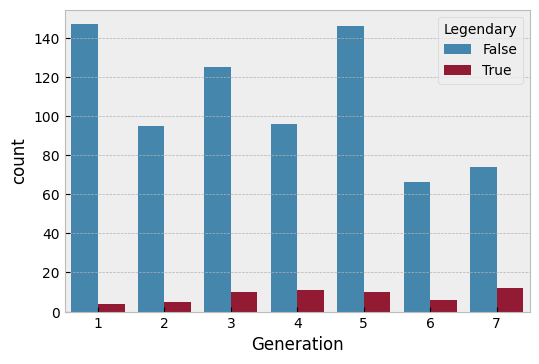

In [20]:
sns.countplot(
    x='Generation', 
    data=pokedata,
    hue='Legendary',
);

I initially thought that the number of legendary pokemon always correlate to the number of pokemon in that gen, looks like that wasn't the case. There doesn't seem to be any noticeable trend either.

## Pokemon Type Distribution
There are 18 types of Pokemon in total as of generation 7. Some Pokemon have only 1 type, while other have secondary type. For example, Charmander is a Fire type, while Bulbasaur is both a Grass type and a Poison type

First, let's take a look of all the 18 types

In [21]:
pokedata['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Now let's see what is the most common primary and secondary type of Pokemon.

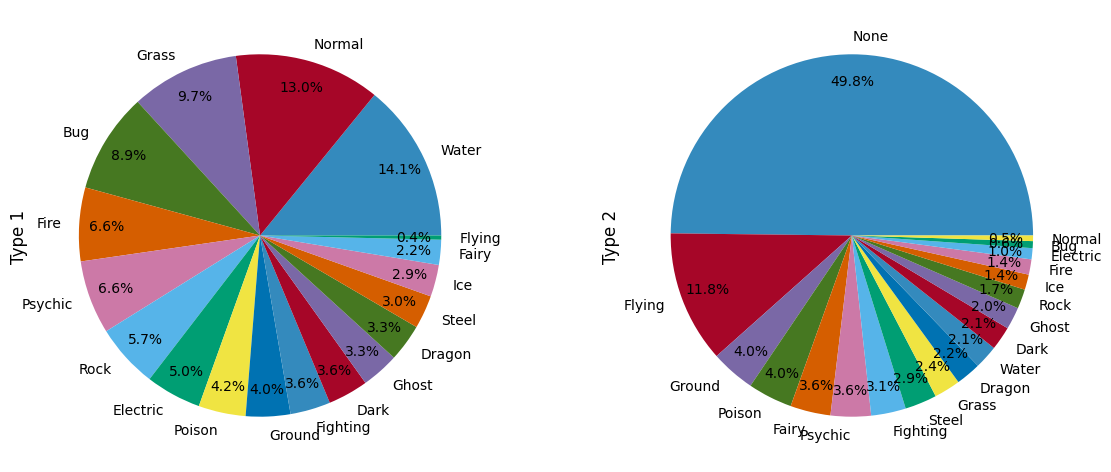

In [22]:
fig, (ax1, ax2) = subplots(1,2, figsize=(14, 6))
pokedata['Type 1'].value_counts().plot(kind='pie', autopct='%.1f%%', pctdistance=0.85, ax=ax1)
pokedata['Type 2'].value_counts().plot(kind='pie', autopct='%.1f%%', pctdistance=0.85, ax=ax2);

We can already see which type of Pokemon is the most and least common, but pie chart is not the ideal choice if the number of slices is too many, so let's just use barplot.

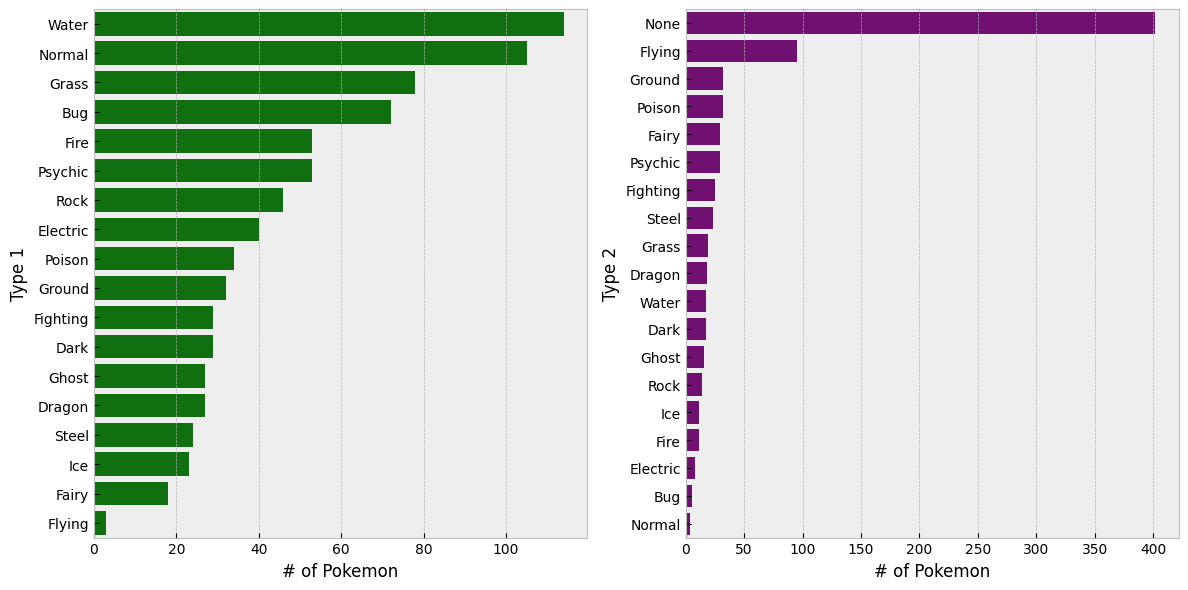

In [23]:
fig, (ax1, ax2) = subplots(1, 2, figsize=(14, 7))
sns.countplot(
    y='Type 1',
    data=pokedata,
    order=pokedata['Type 1'].value_counts().index,
    color='green',
    ax=ax1,
).set_xlabel('# of Pokemon')

sns.countplot(
    y='Type 2',
    data=pokedata,
    order=pokedata['Type 2'].value_counts().index,
    color='purple',
    ax=ax2
).set_xlabel('# of Pokemon');

There are lots of information that can be derived from the above charts, some of the interesting things are:

  - Almost half of all Pokemon don't have secondary type.
  - While Flying is the most common secondary type, it is the least common primary type. It kind of make sense if you think about it, when you see Moltres, the first thing that comes to your mind would be Fire rather than Flying. Or when you see Dragonite, you'll always identify him as a Dragon-type creature rather than Flying-type creature.
  - Water, Normal, and Grass as the most common primary type is to be expected, but I didn't expect Psychic type Pokemon to be that common.

## Pokemon type combinations

We've already seen what is the most and least common type of Pokemon, it will be also interesting to see all the type combination of the Pokemon, note that we will not include Pokemon that doesn't have secondary type

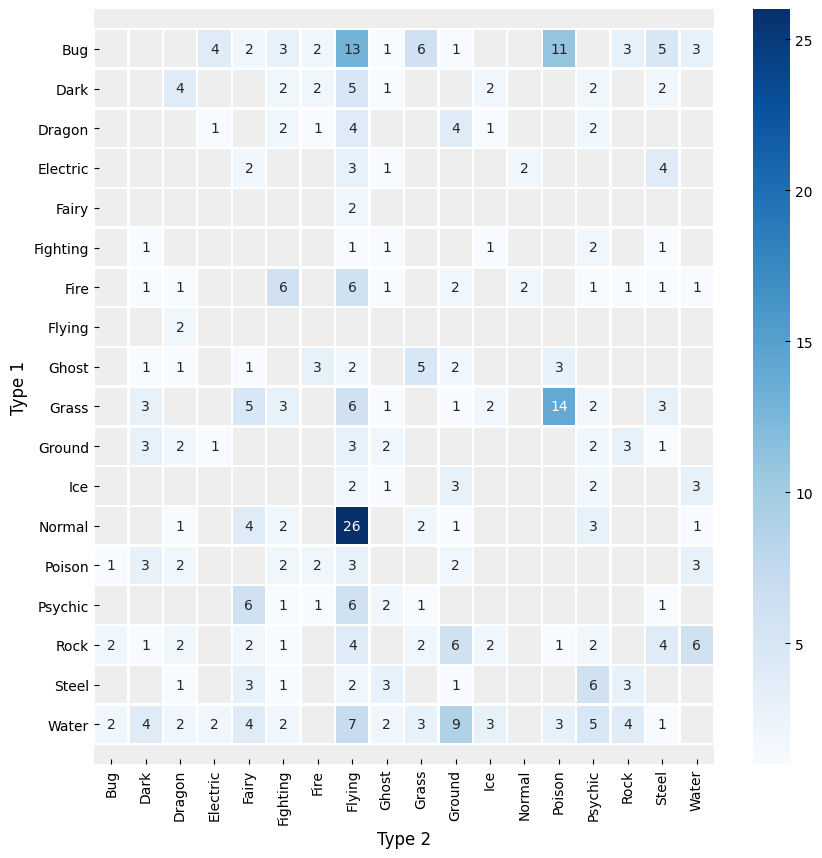

In [24]:
subplots(figsize=(10, 10))
sns.heatmap(
    pokedata[pokedata['Type 2']!='None'].groupby(['Type 1', 'Type 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
);
# fix for mpl bug that cuts off top/bottom of seaborn viz
ylim(*add(ylim(), [0.5, -0.5]));

Normal/Flying, Grass/Poison, Bug/Flying and Bug/Poison are the top 4 combination for dual-type Pokemon.